### Тестовый стенд
* **CPU:** AMD® Ryzen 5 5500U with Radeon Graphics x 12 @ 4GHz

* **RAM:** 8 GB

* **OS:** Ubuntu 23.04 (64-bit)

### Подготовка к измерениям

**Средство измерения:** библиотека Googlebenchmark

Перед проведением замеров, были проделаны следующие действия:

* отключены все обновления на устройстве;
* закрыты фоновые процессы;
* установлена максимальная частота процессора:
```bash
sudo cpupower frequency-set --governor performance
```
* выключен swap:
```bash
sudo swapoff -a
```
* сброшен дисковый кэш:
```bash
sudo sh -c 'echo 3 >/proc/sys/vm/drop_caches'
```
* отключен GUI:
``` bash
sudo systemctl isolate runlevel1.target
su -l shalasheg
```
* программа исполнена одним ядром:
```bash
taskset -c 0 ./DPLL --benchmark_context=pwd='pwd'  --benchmark_repetitions=50 --benchmark_out='bencmarkout.txt'
```
* совершён прогрев из 10 проходов.


**Выборка** - 39 замеров т.к. случился единичный выброс

In [4]:
t = [26149.161944000298, 26322.24900600022, 26267.361316999995, 26297.417354000117, 26197.90369200018, 26309.132053999747, 26294.630005000272, 26293.241947000297, 26020.82023999992, 26184.121546999904, 26442.88757000004, 26330.83653499989, 26356.75623599991, 26464.201599999797, 26132.292935999885, 26291.354469999987, 26396.070077999866, 26255.756592000125, 26341.898136000054, 26528.738174999944, 26277.007826000045, 26523.205050999877, 26292.089447999842, 26000.631728999906, 26077.860844000043, 25932.015276999664, 26342.2196370002, 26229.340048000267, 26278.94612800037, 25959.666879999986, 26612.148086999696, 26327.847632000157, 26292.291374999877, 26309.7227319995, 26301.584378999905, 26286.55710000021, 26164.42829799962, 26237.12975383999, 26275.110687500048]

In [5]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

(array([ 2.,  2.,  2.,  4.,  4., 16.,  4.,  2.,  2.,  1.]),
 array([25932.015277, 26000.028558, 26068.041839, 26136.05512 ,
        26204.068401, 26272.081682, 26340.094963, 26408.108244,
        26476.121525, 26544.134806, 26612.148087]),
 <BarContainer object of 10 artists>)

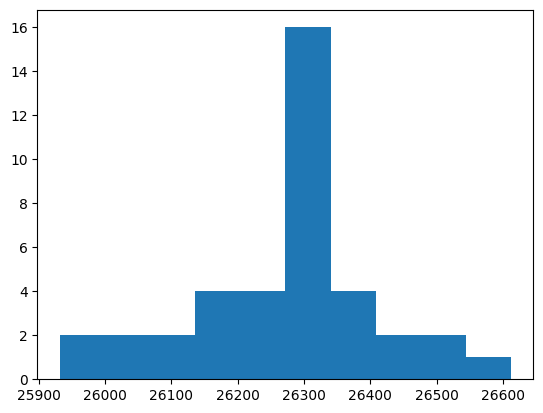

In [6]:
plt.hist(t)

In [7]:
stats.normaltest(t)

NormaltestResult(statistic=1.813057287820663, pvalue=0.4039239570302037)

In [8]:
stats.shapiro(t)

ShapiroResult(statistic=0.9457243051159029, pvalue=0.05902485510366357)

В обоих тестах pvalue > 0.05

**Среднее:**

In [9]:
np.mean(t)

26271.70857298307

**Стандартное отклонение:**

In [10]:
np.std(t, ddof=1)

145.94582057952306

**Стандартное отклонение среднего:**

In [11]:
np.std(t, ddof=1)/math.sqrt(len(t))

23.37003480496752

**Доверительный интервал 95%:**

In [12]:
stats.t.ppf(0.975, df = len(t) - 1)*stats.sem(t)

47.31016206959584

Полученные данные после округления:

**26,27 ± 0.05** секунд
